# Unsupervised Learning and K-Means Clustering with Python
**A tutorial by Thomas Jurczyk, CERES (Bochum)**

This notebook includes the code used in my clustering tutorial for the [Programming Historian](https://programminghistorian.org/). Please note that you need to save the dataset `DNP_authors.csv` in the same folder as this Jupyter notebook. The dataset is available in my [GitHub repository](https://github.com/thomjur/introduction_to_k-means_clustering_PH).

If you have any questions or comments, please send them to [my email address](mailto:thomas.jurczyk-q88@rub.de).
<br>
<br>
---

## 1. Loading dataset & exploratory data analysis

In [1]:
import pandas as pd

# load the dataset that has been stored as .csv files in the same folder
# using the author names as index
df_authors = pd.read_csv("DNP_authors.csv", index_col=0)

# display dataset structure with the pandas .info() method
print(df_authors.info())

# show first 5 rows
print(df_authors.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 1611 entries, Eder, Walter (Berlin) to Stausberg, Michael
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   word_count  1611 non-null   int64 
 1   articles    1611 non-null   int64 
 2   based_in    1611 non-null   object
dtypes: int64(2), object(1)
memory usage: 50.3+ KB
None
                                              word_count  articles  \
Eder, Walter (Berlin)                             171026       141   
Dietz, Karlheinz (Würzburg)                        39484       107   
Ego, Beate (Osnabrück)                             46068        91   
Manganaro, Giacomo (Sant' Agata li Battiata)        7867        49   
Daverio Rocchi, Giovanna (Milan)                   25977        56   

                                                             based_in  
Eder, Walter (Berlin)                                          Berlin  
Dietz, Karlheinz (Würzburg)                 

In [2]:
df_authors.describe()

,word_count,articles
count,1611.000000,1611.000000
mean,12773.718187,13.015518
std,26277.073866,36.859652
min,12.000000,1.000000
25%,1745.000000,1.000000
50%,4429.000000,2.000000
75%,12209.500000,8.000000
max,433508.000000,557.000000


## 2. Initializing k-means & scaler

In [3]:
# clustering part
from sklearn.preprocessing import StandardScaler as SS
from sklearn.cluster import KMeans

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# initializing k-means and scaler

In [5]:
scaler = SS()
kmeans = KMeans(n_clusters=3, random_state=42)

## 3. Applying k-means clustering on the dataset

In [6]:
# scale the "word_count" and "articles" columns of df_authors
df_authors_cp = df_authors.copy()
scaled_columns = scaler.fit_transform(df_authors_cp[["word_count", "articles"]])
df_authors_cp["wc_scaled"] = scaled_columns[:,0]
df_authors_cp["articles_scaled"] = scaled_columns[:,1]
df_authors_cp.head(5)

,word_count,articles,based_in,wc_scaled,articles_scaled
"Eder, Walter (Berlin)",171026,141,Berlin,6.024317,3.473289
"Dietz, Karlheinz (Würzburg)",39484,107,Würzburg,1.016802,2.550585
"Ego, Beate (Osnabrück)",46068,91,Osnabrück,1.267440,2.116371
"Manganaro, Giacomo (Sant' Agata li Battiata)",7867,49,Sant' Agata li Battiata,-0.186788,0.976560
"Daverio Rocchi, Giovanna (Milan)",25977,56,Milan,0.502620,1.166528


In [7]:
# clustering df_authors_cp
kmeans.fit(df_authors_cp[["wc_scaled", "articles_scaled"]])
df_authors_cp["clusters"] = kmeans.labels_

## 4. Plotting the cluster with seaborn

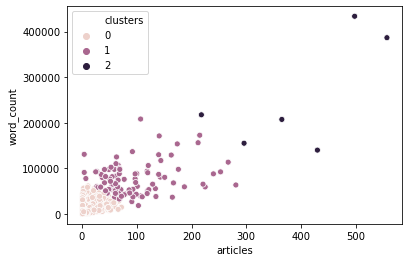

In [8]:
sns.scatterplot(x="articles", y="word_count", hue="clusters", data=df_authors_cp)

In [9]:
df_authors_cp[df_authors_cp["clusters"] == 2]

,word_count,articles,based_in,wc_scaled,articles_scaled,clusters
"Graf, Fritz (Columbus, OH)",207226,365,"Columbus, OH",7.402371,9.552282,2
"Elvers, Karl-Ludwig (Bochum)",433508,498,Bochum,16.016430,13.161684,2
"Hünemörder, Christian (Hamburg)",139941,430,Hamburg,4.840979,11.316275,2
"Eck, Werner (Cologne)",386495,557,Cologne,14.226749,14.762847,2
"Olshausen, Eckart (Stuttgart)",155039,296,Stuttgart,5.415727,7.679735,2
"Ameling, Walter (Jena)",217367,218,Jena,7.788417,5.562943,2


## 5. Applying the "elbow method" (hyperparameter tuning)

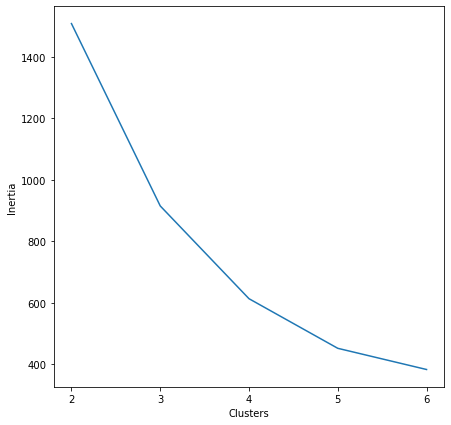

In [10]:
# elbow method
# preparing data for plotting
cluster_range = list(range(2,7))
inertia_list = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_authors_cp[["wc_scaled", "articles_scaled"]])
    inertia_list.append(kmeans.inertia_)

# plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.lineplot(y=inertia_list, x=cluster_range, ax=ax)
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.set_xticks([2,3,4,5,6])

In [11]:
# k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_authors_cp[["wc_scaled", "articles_scaled"]])

df_authors_cp["clusters_2"] = kmeans.labels_

## 6. Plotting the final clusters

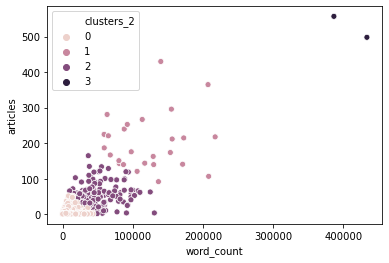

In [12]:
sns.scatterplot(x="word_count", y="articles", hue="clusters_2", data=df_authors_cp)
plt.savefig("results_2")